In [1]:
import pandas as pd
import numpy as np
from pyecharts import options as opts
from pyecharts.charts import Bar  ,Calendar,Tab
from pathlib import Path



In [2]:
df=pd.read_excel("test.xlsx", sheet_name="ap")

In [3]:
print(df.head(10))

        Date        USER        NAME AREA  UNITS  PICKS Shift Column1  Column2
0 2022-04-14      ASHLEY      Ashley   B3   3924    427   NaN     NaN      NaN
1 2022-04-14      BAWANY      BAWANY   A1    641    221   NaN     NaN      NaN
2 2022-04-14   BSUMANGIL   Benedicta   B3   2507    541   NaN     NaN      NaN
3 2022-04-14     DALDRIN      Doucot   AA   3721    470   NaN     NaN      NaN
4 2022-04-14      Doucot      Aldrin   B3   1332     18   NaN     NaN      NaN
5 2022-04-14  DALWINDER1   Dalwinder   B3   4605    798   NaN     NaN      NaN
6 2022-04-14      DGRANT       Diana   A1    120     36   NaN     NaN      NaN
7 2022-04-14     EDHILAN      Dhilan   A1    586    147   NaN     NaN      NaN
8 2022-04-14      Dhilan  Jayasinghe   B3    243     50   NaN     NaN      NaN
9 2022-04-14  ERAGUKUMAR   Ragukumar   AA   3405    551   NaN     NaN      NaN


In [4]:
s = df[['USER','PICKS','AREA']]
print(s)

            USER  PICKS AREA
0         ASHLEY    427   B3
1         BAWANY    221   A1
2      BSUMANGIL    541   B3
3        DALDRIN    470   AA
4         Doucot     18   B3
...          ...    ...  ...
2644     SBARRWM     71   AA
2645      SHAYNE     18   AA
2646  SSRITHARAN     90   A1
2647  SSRITHARAN     46   B3
2648       ESIVA    984   B3

[2649 rows x 3 columns]


In [5]:
pivoted = df.pivot_table(index="USER", columns="AREA", values="PICKS",aggfunc= 'sum',margins = True, margins_name='Total')
pivoted
df1=pivoted.tail(10).fillna('0').astype(int)
print(df1)

AREA             A1      AA      B3     G1    Total
USER                                               
TUSHY          5592       0    5325      0    10917
Tushyanthii       0       0    1241      0     1241
USANTHAN          0       0     218      0      218
VBERBER01         0       0       0      1        1
VIMALA            0       0   69422      0    69422
Vijaya          581       0    2216      0     2797
WINKLETTE      4041       0    5577      0     9618
YSUYEN            0       2    1797      0     1799
riley             0       0       1      0        1
Total        112478  121836  813090  55104  1102508


In [6]:
s.loc[(s['PICKS'] > 920) & (s['AREA'] =='B3') ,s.style.applymap()] = 'GREEN' 
print(s)

TypeError: applymap() missing 1 required positional argument: 'func'

In [8]:
def bg_colour_col (col):
    colour = 'red'
    return ['background-color: %s' % colour 
                if col.name=='PICKS'   # color column `Total` or row `4`
                else ''
             for i,x in col.iteritems()]

s.style.apply(bg_colour_col)

,USER,PICKS,AREA
0,ASHLEY,427,B3
1,BAWANY,221,A1
2,BSUMANGIL,541,B3
3,DALDRIN,470,AA
4,Doucot,18,B3
5,DALWINDER1,798,B3
6,DGRANT,36,A1
7,EDHILAN,147,A1
8,Dhilan,50,B3
9,ERAGUKUMAR,551,AA


In [9]:
def even_number_background(cell_value):

    top = 'background-color: red;'
    mid = 'background-color: green;'
    low = 'background-color: yellow;'
    default = ''

    if type(cell_value) in [float, int,str]:
        if (cell_value =='RED')  :
            return top
        if (cell_value =='GREEN')  :
            return mid
        if (cell_value =='YELLOW')  :
            return low
    return default



s.style.applymap(even_number_background)


,USER,PICKS,AREA
0,ASHLEY,427,B3
1,BAWANY,221,A1
2,BSUMANGIL,541,B3
3,DALDRIN,470,AA
4,Doucot,18,B3
5,DALWINDER1,798,B3
6,DGRANT,36,A1
7,EDHILAN,147,A1
8,Dhilan,50,B3
9,ERAGUKUMAR,551,AA


<AxesSubplot:xlabel='USER'>

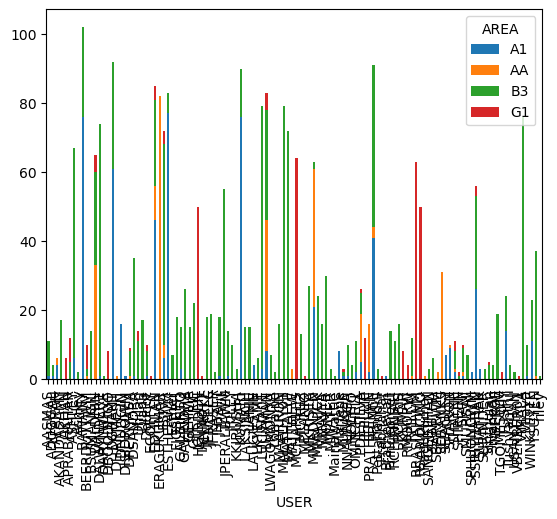

In [7]:
df.groupby('USER')['AREA',]\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

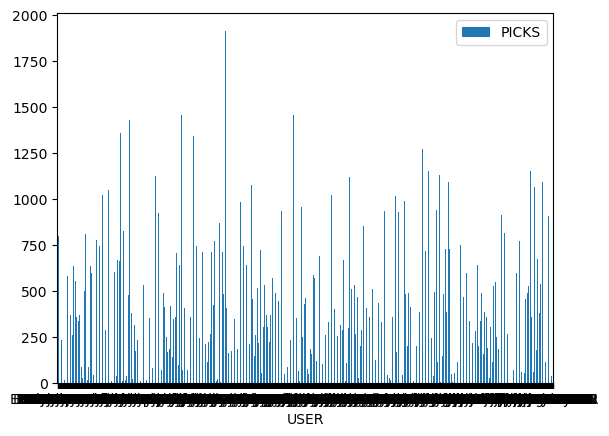

In [13]:
ax = df.plot.bar(x='USER', y='PICKS', rot=0)

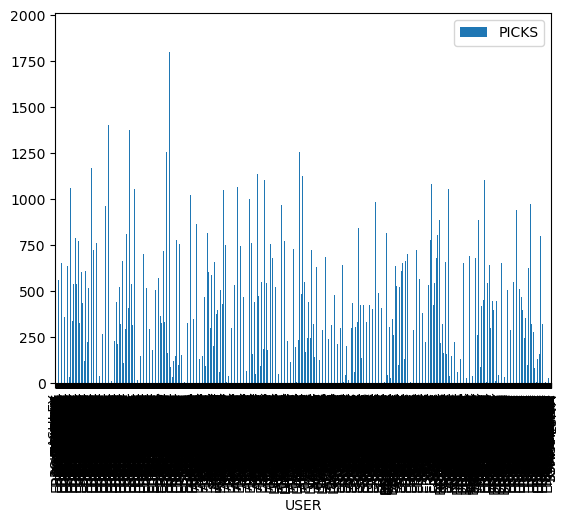

In [14]:
ax = s.plot.bar(x='USER', y='PICKS',stacked=True)

<AxesSubplot:xlabel='USER'>

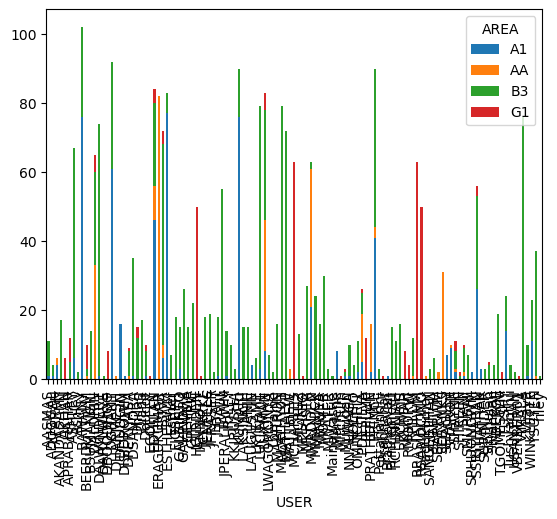

In [15]:
df.groupby(['USER', 'AREA']).size().unstack().plot(kind='bar', stacked=True)

AREA
A1    AxesSubplot(0.125,0.11;0.775x0.77)
AA    AxesSubplot(0.125,0.11;0.775x0.77)
B3    AxesSubplot(0.125,0.11;0.775x0.77)
G1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: PICKS, dtype: object

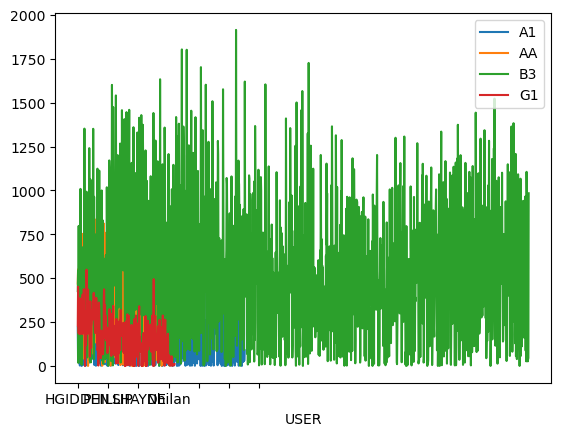

In [16]:
df.set_index('USER', inplace=True)

#group data by product and display sales as line chart
df.groupby('AREA')['PICKS'].plot(legend=True)

In [17]:
df

,Date,NAME,AREA,UNITS,PICKS,Shift,Column1,Column2
USER,,,,,,,,
ASHLEY,2022-04-14,Ashley,B3,3924,427,NaN,NaN,NaN
BAWANY,2022-04-14,BAWANY,A1,641,221,NaN,NaN,NaN
BSUMANGIL,2022-04-14,Benedicta,B3,2507,541,NaN,NaN,NaN
DALDRIN,2022-04-14,Doucot,AA,3721,470,NaN,NaN,NaN
Doucot,2022-04-14,Aldrin,B3,1332,18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
SBARRWM,2023-01-27,Stephen,AA,111,71,NaN,NaN,NaN
SHAYNE,2023-01-27,Shayne,AA,37,18,NaN,NaN,NaN
SSRITHARAN,2023-01-27,Sinthujan,A1,432,90,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2649 entries, ASHLEY to ESIVA
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2649 non-null   datetime64[ns]
 1   NAME     2649 non-null   object        
 2   AREA     2649 non-null   object        
 3   UNITS    2649 non-null   int64         
 4   PICKS    2649 non-null   int64         
 5   Shift    936 non-null    object        
 6   Column1  1 non-null      object        
 7   Column2  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 186.3+ KB


In [46]:
df['day']=df['USER']
df.head()

KeyError: 'USER'

In [48]:
grouped_by_month=df.groupby(by=['Month']).sum()[['PICKS']]
grouped_by_month

,PICKS
Month,
1,26413
2,33634
3,42003
4,26440
5,25864
6,36903
7,25113
8,27487
9,43770


In [44]:
bar_chart_by_month=(
    Bar()
    .add_xaxis(grouped_by_month.index.tolist())
    .add_yaxis('AREA',grouped_by_month['PICKS'].round(0).tolist())
    .set_global_opts(
            title_opts=opts.TitleOpts(title='PICKS',subtitle='---')
    )
)

In [45]:
bar_chart_by_month.render_notebook()

In [26]:
group_by_sub_cat=df.groupby(by='AREA',as_index=False).sum().sort_values(by=['PICKS'])

In [27]:
group_by_sub_cat.head(5)

,AREA,UNITS,PICKS,Column2,Month
3,G1,124597,55104,0.0,1741
0,A1,553326,112478,0.0,2644
1,AA,688186,121836,0.0,1406
2,B3,2553469,813090,0.0,7493


In [28]:
bar_chart_by_sc=(
    Bar()
    .add_xaxis(group_by_sub_cat['AREA'].tolist())
    .add_yaxis('AREA',group_by_sub_cat['PICKS'].round(0).tolist())
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position='right'))
    .set_global_opts(
            title_opts=opts.TitleOpts(title='PICKS',subtitle='---')
    )
)

In [29]:
bar_chart_by_sc.render_notebook()

In [30]:
pick_by_day=df.groupby(by='Date').sum()[['PICKS']].round(0)
pick_by_day=pick_by_day.reset_index()
pick_by_day.head(5)

,Date,PICKS
0,2022-04-14,10028
1,2022-04-15,12537
2,2022-04-18,9732
3,2022-04-19,10825
4,2022-04-20,13078


In [31]:
data=pick_by_day [['Date','PICKS']].values.tolist()
data

[[Timestamp('2022-04-14 00:00:00'), 10028],
 [Timestamp('2022-04-15 00:00:00'), 12537],
 [Timestamp('2022-04-18 00:00:00'), 9732],
 [Timestamp('2022-04-19 00:00:00'), 10825],
 [Timestamp('2022-04-20 00:00:00'), 13078],
 [Timestamp('2022-04-21 00:00:00'), 12610],
 [Timestamp('2022-04-22 00:00:00'), 10110],
 [Timestamp('2022-04-25 00:00:00'), 14301],
 [Timestamp('2022-04-26 00:00:00'), 14378],
 [Timestamp('2022-04-27 00:00:00'), 13140],
 [Timestamp('2022-04-28 00:00:00'), 13723],
 [Timestamp('2022-04-29 00:00:00'), 12043],
 [Timestamp('2022-05-02 00:00:00'), 9659],
 [Timestamp('2022-05-03 00:00:00'), 12621],
 [Timestamp('2022-05-04 00:00:00'), 13465],
 [Timestamp('2022-05-05 00:00:00'), 13121],
 [Timestamp('2022-05-06 00:00:00'), 6156],
 [Timestamp('2022-05-09 00:00:00'), 11408],
 [Timestamp('2022-05-10 00:00:00'), 11830],
 [Timestamp('2022-05-12 00:00:00'), 12504],
 [Timestamp('2022-05-13 00:00:00'), 14084],
 [Timestamp('2022-05-14 00:00:00'), 4815],
 [Timestamp('2022-05-16 00:00:00'), 

In [32]:
maxpick=df['PICKS'].max()
minpick=16000
maxpick

1914

In [33]:
pick_cal=(
   Calendar()
    .add('', data, calendar_opts=opts.CalendarOpts(range_='2023'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='PICK Calendar', subtitle='LINES'),
        legend_opts=opts.LegendOpts(is_show=False),
        visualmap_opts=opts.VisualMapOpts(
                max_=maxpick,
                min_=minpick,
                orient='horizontal',
                is_piecewise=False,
                pos_top='230px',
                pos_left='100px',
        )
    )

)

In [34]:
pick_cal.render_notebook()

In [35]:
tab=Tab(page_title='test ')
tab.add(pick_cal,'pc')
tab.render(Path.cwd() / 'sa.html')

'C:\\Users\\ysuyendran\\Desktop\\py\\sa.html'

In [36]:
attr = ["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"]
v1 = [5, 20, 36, 10, 75, 90]
v2 = [10, 25, 8, 60, 20, 80]
bar = Bar("y")
bar.add("商家A", attr, v1, is_stack=True)
bar.add("商家B", attr, v2, is_stack=True)
bar.render()

AttributeError: 'str' object has no attribute 'get'